In [1]:
#%pip install icecream

In [2]:
from dataclasses import dataclass
from icecream import ic
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd

### Подготовка данных

In [3]:
@dataclass
class Request:
  id: int
  receipt_time: int
  process_time: int
  waiting_time: int = 0
  ticks_in_pocessor: int = 0

In [4]:
def get_requests_queue():
  return [
      Request(1, 0, 10),
      Request(2, 5, 10),
      Request(3, 15, 5),
      Request(4, 30, 10),
      Request(5, 35, 5),
      Request(6, 40, 10),
      Request(7, 50, 5),
      Request(8, 70, 5),
      Request(9, 80, 10),
      Request(10, 85, 5),
  ]

### Рассчет исходных характеристик системы

In [5]:
requests = get_requests_queue()
life_time = 100
requests_count = len(requests)
input_time = life_time / requests_count
λ = 1 / input_time
all_process_time = sum(r.process_time for r in requests)
avg_process_time = all_process_time / input_time
μ = 1 / avg_process_time

In [6]:
print('Общее время рассматриваемого интервала', life_time, sep=' = ')
print('Всего заявок', requests_count, sep=' = ')
print('Среднее время между заявками', input_time, sep=' = ')
print('Интенсивность входного потока', λ, sep=' = ')
print('Общее время обработки заявок', all_process_time, sep=' = ')
print('Среднее время обработки одной заявки', avg_process_time, sep=' = ')
print('Интенсивность обслуживания', μ, sep=' = ')

Общее время рассматриваемого интервала = 100
Всего заявок = 10
Среднее время между заявками = 10.0
Интенсивность входного потока = 0.1
Общее время обработки заявок = 75
Среднее время обработки одной заявки = 7.5
Интенсивность обслуживания = 0.13333333333333333


### Интуитивный подход



In [7]:
def run(requests):
  queue_snapshots = []
  queue = []
  working_time = 0

  for t in range (0, life_time + 1):
    if (len(queue) != 0):
      queue[0].ticks_in_pocessor += 1
      if queue[0].process_time == queue[0].ticks_in_pocessor:
        queue.remove(queue[0])
    request = next((x for x in requests if x.receipt_time == t), None)
    if request is not None:
      queue.append(request)
    for i in range (1, len(queue)):
      queue[i].waiting_time += 1
    if (len(queue) != 0):
      working_time += 1
    queue_snapshots.append(copy.deepcopy(queue))

  free_time = life_time - working_time
  ρ = working_time / life_time

  return free_time, ρ, queue_snapshots, working_time

In [8]:
def show_diagram():
  plt.title('Диаграмма работы системы')
  plt.xlabel('Время')
  plt.ylabel('Номер заявки')
  plt.grid()
  plt.xticks(np.arange(0, life_time, 5))
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()

In [9]:
def diagram_results():
  print('Суммарное время занятости системы', working_time, sep=' = ')
  print('Суммарное время простоя системы', free_time, sep=' = ')
  print('Загрузка системы', ρ, sep=' = ')

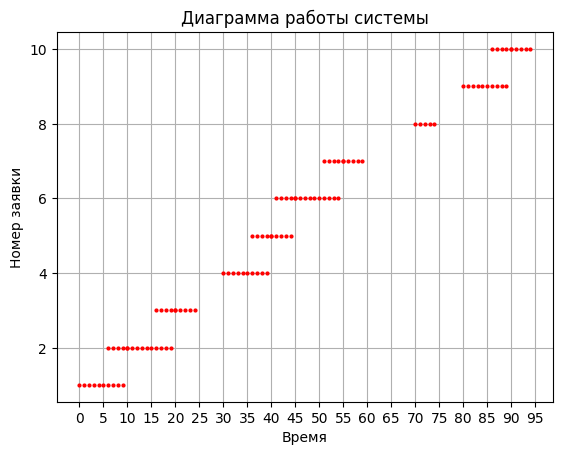

Суммарное время занятости системы = 75
Суммарное время простоя системы = 25
Загрузка системы = 0.75


In [10]:
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram()
diagram_results()

In [11]:
def show_queue_diagram():
  plt.title('Диаграмма заявок, стоящих в очереди')
  plt.xlabel('Время')
  plt.ylabel('Номер заявки')
  plt.grid()
  plt.xticks(np.arange(0, life_time, 5))
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()

In [12]:
def queue_diagram_results():
  waiting_time = sum(r.waiting_time for r in requests)
  avg_waiting_time = waiting_time / requests_count
  print('Суммарное время ожидания', waiting_time, sep=' = ')
  print('Среднее время ожидания', avg_waiting_time, sep=' = ')
  return avg_waiting_time

In [13]:
def being_results():
  being_time = sum(len(y) for y in queue_snapshots) / requests_count
  being_count = sum(len(y) for y in queue_snapshots) / life_time
  print('Время пребывания заявок в системе', being_time, sep=' = ')
  print('Среднее количество заявок в системе', being_count, sep=' = ')
  return being_count, being_time

In [14]:
def waiting_results():
  waiting_count = 0
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      waiting_count += 1
  waiting_count /= life_time
  print('Среднее число заявок в очереди за единицу времени', waiting_count, sep=' = ')
  return waiting_count

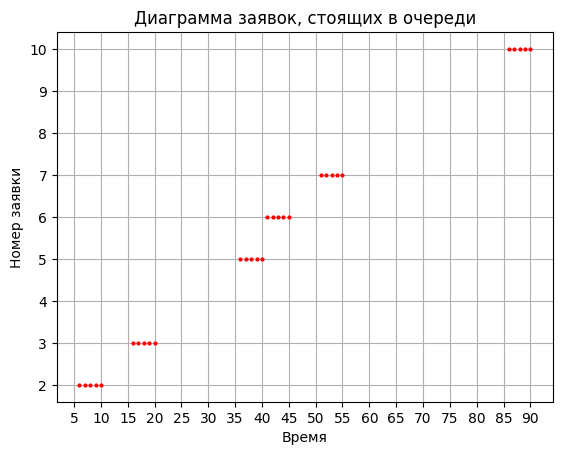

Суммарное время ожидания = 30
Среднее время ожидания = 3.0
Время пребывания заявок в системе = 10.5
Среднее количество заявок в системе = 1.05
Среднее число заявок в очереди за единицу времени = 0.3


In [15]:
show_queue_diagram()
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results()
waiting_count = waiting_results()

In [16]:
intuitive = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

### Теоретический подсчет

In [17]:
ρ = λ / μ
avg_waiting_time = avg_process_time * ρ / (1 - ρ)
being_time = avg_process_time / (1 - ρ)
waiting_count = ρ ** 2 / (1 - ρ)
being_count = ρ / (1 - ρ)

In [18]:
theoretical = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

### Детерминированный поток

In [19]:
requests = []
for i in range(10):
  requests.append(Request(i + 1, input_time * i, 7))

In [20]:
life_time = 100
requests_count = len(requests)
input_time = life_time / requests_count
λ = 1 / input_time
all_process_time = sum(r.process_time for r in requests)
avg_process_time = all_process_time / input_time
μ = 1 / avg_process_time

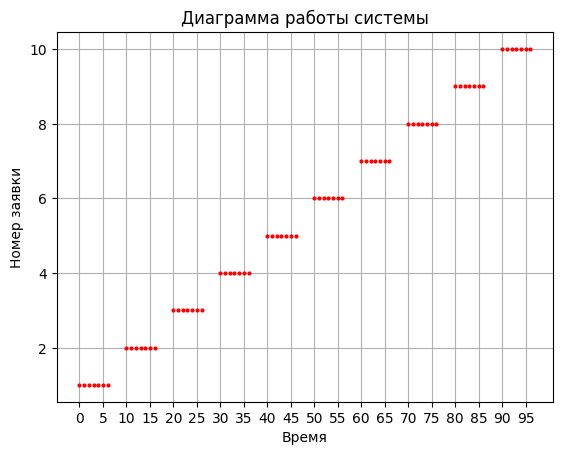

Суммарное время занятости системы = 70
Суммарное время простоя системы = 30
Загрузка системы = 0.7


In [21]:
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram()
diagram_results()

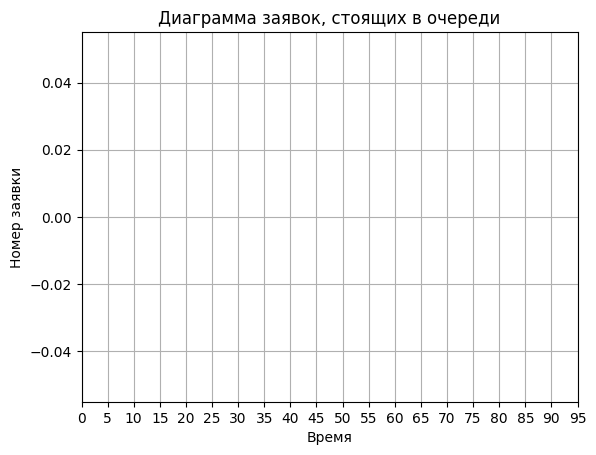

Суммарное время ожидания = 0
Среднее время ожидания = 0.0
Время пребывания заявок в системе = 7.0
Среднее количество заявок в системе = 0.7
Среднее число заявок в очереди за единицу времени = 0.0


In [22]:
show_queue_diagram()
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results()
waiting_count = waiting_results()

In [23]:
determine = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

### Результаты

In [24]:
data = {
    'Характеристики системы': ['Т_вх (мин)', 'Т_0 (мин)', 'ρ', 'N_w (заяв)', 'Т_w (мин)', 'N_s (заявки)', 'T_n (мин)'],
    'Интуитивный подход': intuitive,
    'Теор. подсчет.': theoretical,
    'Детермин. поток': determine
}

df = pd.DataFrame(data)
print(df)

  Характеристики системы  Интуитивный подход  Теор. подсчет.  Детермин. поток
0             Т_вх (мин)               10.00           10.00             10.0
1              Т_0 (мин)                7.50            7.50              7.0
2                      ρ                0.75            0.75              0.7
3             N_w (заяв)                0.30            2.25              0.0
4              Т_w (мин)                3.00           22.50              0.0
5           N_s (заявки)                1.05            3.00              0.7
6              T_n (мин)               10.50           30.00              7.0
